# Quantum Fourier Transform

Implementation of quantum Fourier transform

In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import numpy as np

In [4]:
def QFT_circuit(n):
    """
    Constructs a Quantum Fourier Transform (QFT) circuit of n qubits.

    Parameters:
    n (int): Number of qubits.

    Returns:
    QuantumCircuit: QFT circuit.
    """
    qc = QuantumCircuit(n)
    
    for qubit in reversed(range(n)):    
        
        # leftmost qubits in current iteration
        m = (n-qubit)-1
        
        # apply phase correction
        for other in (range(qubit+1, n)):            
            phase = np.pi/(2**(m - (other-(qubit+1))))
            qc.cp(phase, qubit, other)      
        
        # apply H gate to rihtmost qubit
        qc.h(qubit)
        
        # apply swap operatios to move rightmost qubit to leftmost position
        if qubit != n-1:
            for i in range((n-1)-qubit):
                qc.swap(qubit+i, qubit+(i+1))
                
    return qc

QFT_circuit(4).draw()

»
q_0: ─────────────────────────────────────────────────■────────■───────»
                                             ┌───┐    │P(π/8)  │       »
q_1: ───────────────────────■────────■───────┤ H ├─X──■────────┼───────»
                   ┌───┐    │P(π/4)  │       └───┘ │           │P(π/4) »
q_2: ──────■───────┤ H ├─X──■────────┼─────────────X─────X─────■───────»
     ┌───┐ │P(π/2) └───┘ │           │P(π/2)             │             »
q_3: ┤ H ├─■─────────────X───────────■───────────────────X─────────────»
     └───┘                                                             »
«              ┌───┐         
«q_0: ─■───────┤ H ├─X───────
«      │       └───┘ │       
«q_1: ─┼─────────────X──X────
«      │                │    
«q_2: ─┼────────────────X──X─
«      │P(π/2)             │ 
«q_3: ─■───────────────────X─
«

In [5]:
QFT(4).decompose().draw()

┌───┐»
q_0: ──────────────────────────────────────■─────────────■────────■───────┤ H ├»
                                           │       ┌───┐ │        │P(π/2) └───┘»
q_1: ────────────────────■────────■────────┼───────┤ H ├─┼────────■─────────X──»
                   ┌───┐ │        │P(π/2)  │       └───┘ │P(π/4)            │  »
q_2: ──────■───────┤ H ├─┼────────■────────┼─────────────■──────────────────X──»
     ┌───┐ │P(π/2) └───┘ │P(π/4)           │P(π/8)                             »
q_3: ┤ H ├─■─────────────■─────────────────■───────────────────────────────────»
     └───┘                                                                     »
«        
«q_0: ─X─
«      │ 
«q_1: ─┼─
«      │ 
«q_2: ─┼─
«      │ 
«q_3: ─X─
«

Check if the implentation works

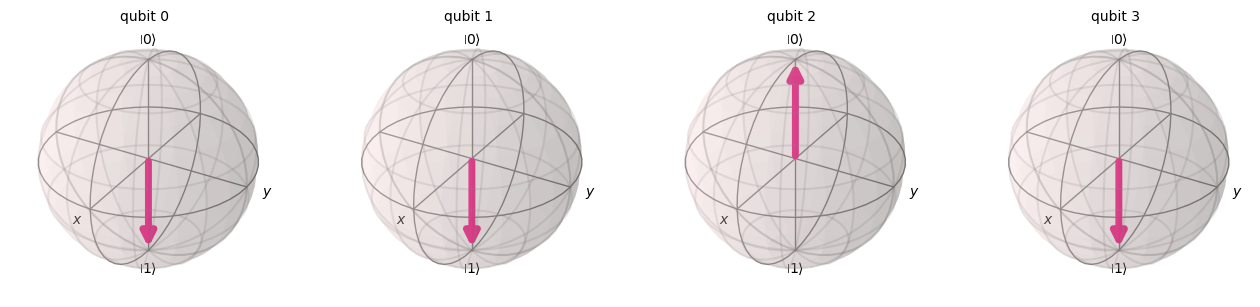

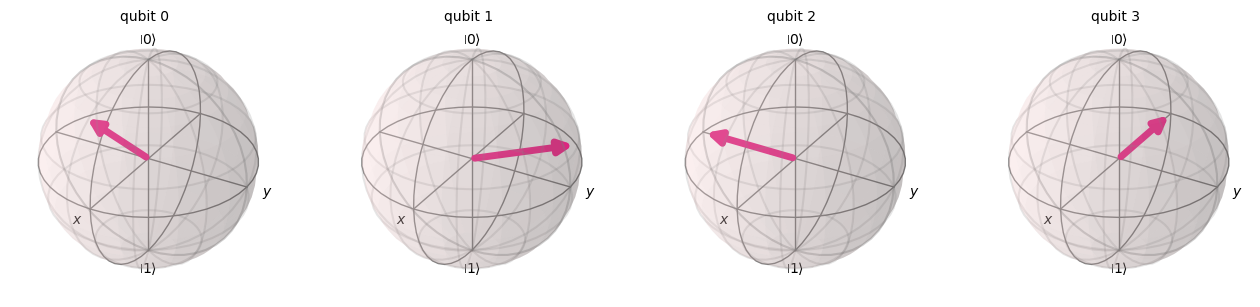

In [6]:
state = '1011'
qc = QuantumCircuit(len(state))
qc.initialize(Statevector.from_label(state).data, qc.qubits)
display(plot_bloch_multivector(Statevector.from_instruction(qc).data))
qc.append(QFT_circuit(len(state)), qc.qubits)
display(plot_bloch_multivector(Statevector.from_instruction(qc).data))

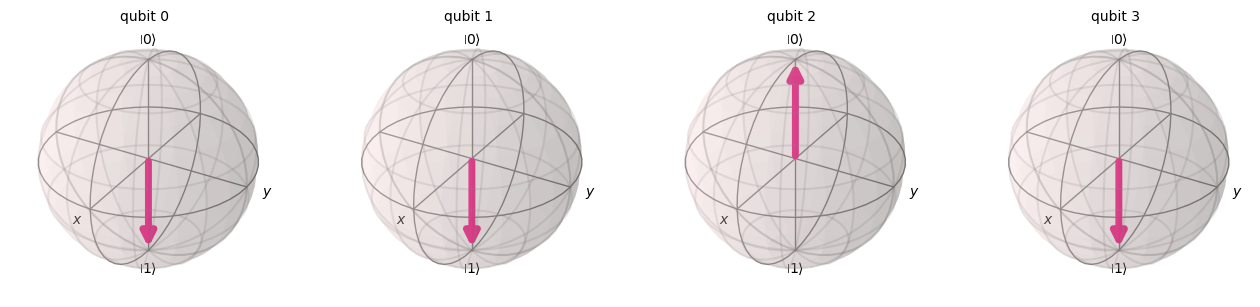

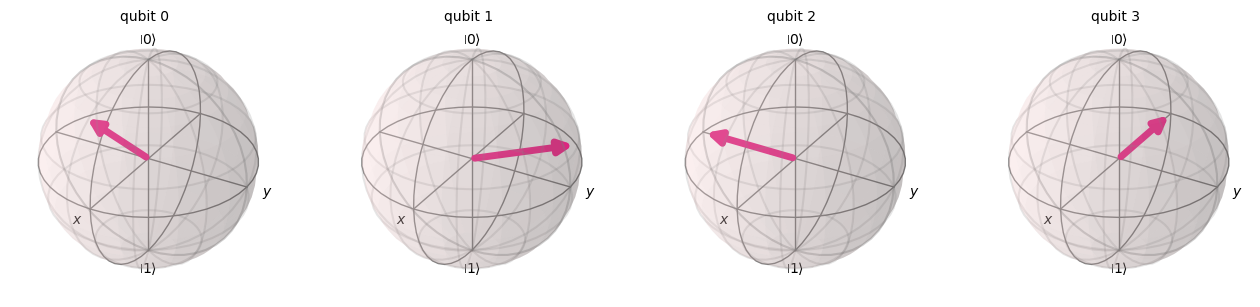

In [7]:
qc = QuantumCircuit(len(state))
qc.initialize(Statevector.from_label(state).data, qc.qubits)
display(plot_bloch_multivector(Statevector.from_instruction(qc).data))
qc.append(QFT(len(state)), qc.qubits)
display(plot_bloch_multivector(Statevector.from_instruction(qc).data))